In [1]:
# Part II - Analyze Users

# import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os

warnings.filterwarnings('ignore')
os.getcwd()
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [2]:
# load the dataset
data = pd.read_csv("orders.csv", header=0)
data.head()

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0


In [3]:
# basic descriptive analysis of data

# Number of users and orders
unique_users, unique_orders = data["user_id"].nunique(), data["order_id"].nunique()
print(f"We have {unique_users} users and {unique_orders} orders \n")

# Number of unique cities
unique_cities = data["city"].nunique()
print(f"We have {unique_cities} cities \n")

# Average number of orders per user
print(f"Each user places {round(unique_orders/unique_users,2)} orders on average")



We have 121943 users and 534270 orders 

We have 46 cities 

Each user places 4.38 orders on average


Total Orders per User
     user_id  num_orders
0   44118921           1
1  108938802           3
2  110361993          11
3  138437670           1
4  144777339          14
5  145424244          12
6  153963390           3
7  155515962           1
8  165219537           1
9  167289633           2 


Distribution of Users by Ordering Frequency
1     40835
2     21361
3     13972
4      9792
5      7130
6      5345
7      4071
8      3284
9      2638
10     2075
Name: num_orders, dtype: int64 




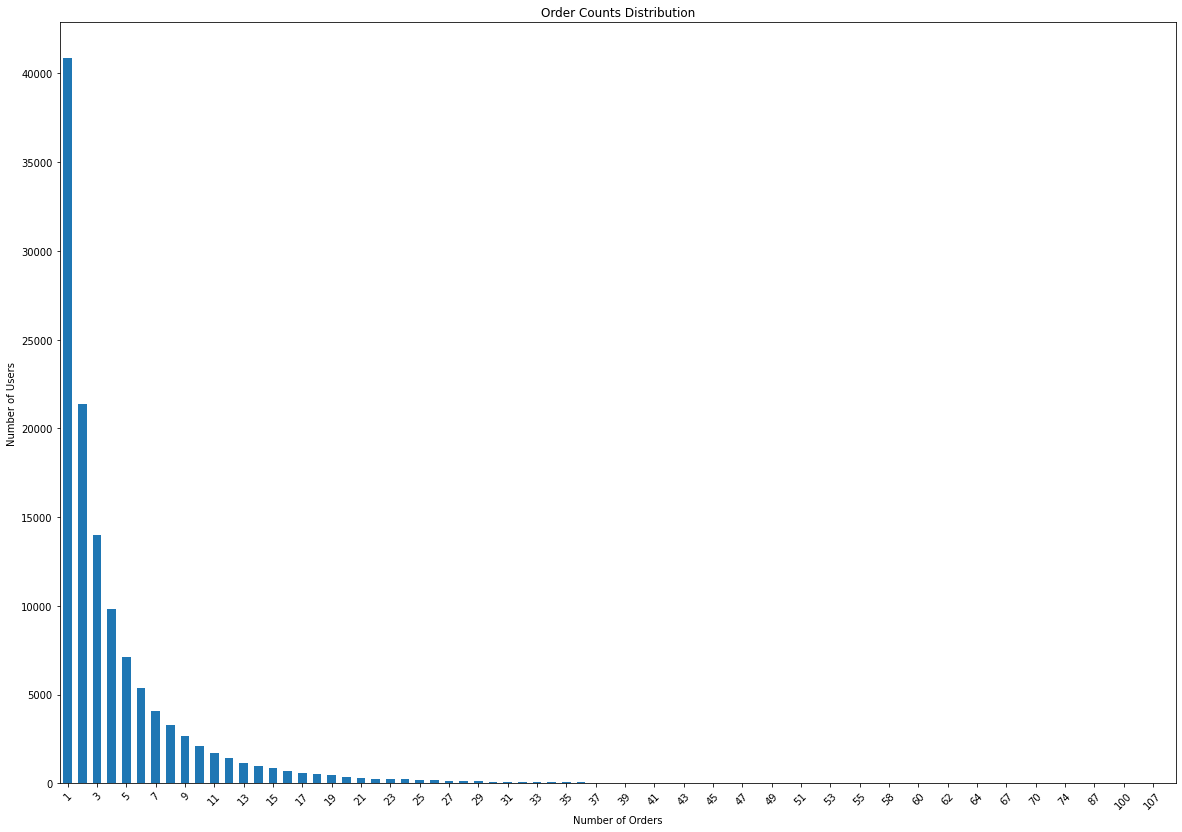

The Margins of Bin 1 are (1.0, 2.0] - It contains 62196 users
The Margins of Bin 2 are (2.0, 5.0] - It contains 30894 users
The Margins of Bin 3 are (5.0, 135.0] - It contains 28853 users


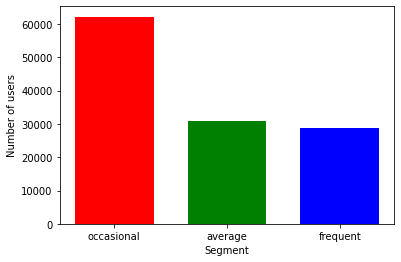

In [4]:
# Question A. We need to segment existing customers based on their frequency and order value

# First let's examine the frequency that users place orders.

# Here calculate how many orders each user has placed for the respective month (January)
orders_per_user = data.groupby('user_id')['order_id'].nunique().reset_index()
orders_per_user.rename(columns={'order_id': 'num_orders'}, inplace=True)
print("Total Orders per User")
print(orders_per_user.head(10), "\n"*2)

# Calculate the distribution of orders i.e how many users have placed 1 order, how many 2 etc.
order_counts = orders_per_user['num_orders'].value_counts().sort_index()
print("Distribution of Users by Ordering Frequency")
print(order_counts.head(10), "\n"*2)

# Visualize the above Distribution 
order_counts.plot(kind='bar', figsize=(20, 14), width=0.6)
plt.title("Order Counts Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Users")
plt.xticks(np.arange(0, len(order_counts), 2), rotation=45)
plt.show()

# Segment the distribution on three bins. !Note q=4 
# The segmentation decides the bountaries of each bin, on which we assign a proper name
bin_labels = ["occasional", "average", "frequent"]
orders_per_user["segment"], bins = pd.qcut(orders_per_user["num_orders"], q=4, labels=bin_labels, duplicates='drop', retbins=True)
segment_counts = orders_per_user['segment'].value_counts()


# Print the calculated margins
for i in range(len(bins)-1):
    print(f"The Margins of Bin {i+1} are ({bins[i]}, {bins[i+1]}] - It contains {segment_counts[i]} users")

# Visualize the load of user each bin is assigned with
colors = ['r', 'g', 'b']
plt.bar(segment_counts.index, segment_counts.values, color=colors, width=0.7)
plt.xlabel('Segment')
plt.ylabel('Number of users')
plt.show()


In [5]:
# Now let's examine the segmentation based on the order value of each user.
# Here I assume that order value refers to the amount spent by each user on average

total_spent_per_user = data.groupby('user_id')['amount'].sum().reset_index()
total_spent_per_user.rename(columns={'amount': 'total_spent'}, inplace=True)
print(total_spent_per_user.head(5), "\n")
average = total_spent_per_user["total_spent"].mean()
print(f"Users spent {round(average, 2)} € on average \n")


     user_id  total_spent
0   44118921         33.3
1  108938802         44.2
2  110361993        137.0
3  138437670          5.5
4  144777339         60.8 

Users spent 37.34 € on average 



     user_id  amount
0   44118921   33.30
1  108938802   44.20
2  110361993  137.00
3  138437670    5.50
4  144777339   60.80
5  145424244  162.75
6  153963390   36.50
7  155515962    5.50
8  165219537    4.30
9  167289633   17.00
The Margins of Bin 1 are (0.4, 14.8] - It contains 40836 users
The Margins of Bin 2 are (14.8, 36.8] - It contains 40628 users
The Margins of Bin 3 are (36.8, 1351.5] - It contains 40479 users


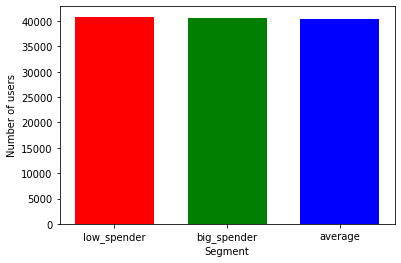

In [6]:
# Calculate total amount of money spent by each user
user_totals = data.groupby('user_id')['amount'].sum().reset_index()
print(user_totals.head(10))
user_totals['amount'] = user_totals['amount'].round(1)

# Create bins for segmenting users based on amount of money spent
bin_labels = ["low_spender", "average", "big_spender"]
user_totals["segment"], retbins = pd.qcut(user_totals['amount'], q=3, labels=bin_labels, retbins=True)
segment_counts = user_totals['segment'].value_counts()
bins = [round(retbin, 2) for retbin in retbins]

# Print the calculated margins
for i in range(len(bins)-1):
    print(f"The Margins of Bin {i+1} are ({bins[i]}, {bins[i+1]}] - It contains {segment_counts[i]} users")

colors = ['r', 'g', 'b']
plt.bar(segment_counts.index, segment_counts.values, color=colors, width=0.7)
plt.xlabel('Segment')
plt.ylabel('Number of users')
plt.show()

In [7]:
# combine the results so as to end up in a new dataframe that holds the aggregated information for each user + his segment (category)

joined_df = pd.merge(user_totals, orders_per_user, on='user_id')
joined_df.rename(columns = {'segment_x':'spent_amount_segment', 'segment_y':'orders_placed_segment'}, inplace = True)
print(joined_df.shape)
print(joined_df.head(10))


(121943, 5)
     user_id  amount spent_amount_segment  num_orders orders_placed_segment
0   44118921    33.3              average           1            occasional
1  108938802    44.2          big_spender           3               average
2  110361993   137.0          big_spender          11              frequent
3  138437670     5.5          low_spender           1            occasional
4  144777339    60.8          big_spender          14              frequent
5  145424244   162.8          big_spender          12              frequent
6  153963390    36.5              average           3               average
7  155515962     5.5          low_spender           1            occasional
8  165219537     4.3          low_spender           1            occasional
9  167289633    17.0              average           2            occasional


In [8]:
# Question B Which segment could be a valuable target group for a Marketing campaign about “Breakfast” cuisine_parent?

# The target group should have the following criteria:
# 1. Is an occasional user (i.e not loyal)
# 2. Has not ordered Breakfast on January (1-2 orders)
# 3. Exists in a city where other cuisines are more popular than "Breakfast" (expresses city culture)


In [9]:
# Start with no.3 - Find the cities 
cities = data["city"].unique().tolist()

data_grouped = data.groupby(['city', 'cuisine']).size().reset_index(name='counts')
data_grouped_sorted = data_grouped.sort_values(['city', 'counts'], ascending=[True, False])

df_breakfast = data_grouped_sorted[data_grouped_sorted['cuisine'] == 'Breakfast']
df_max_counts = data_grouped_sorted.groupby('city')['counts'].max().reset_index(name='max_count')

df_breakfast_max = pd.merge(df_breakfast, df_max_counts, on='city', how='right')

# Get the cities where breakfast is the most popular cuisine
cities_most_popular_breakfast = df_breakfast_max[df_breakfast_max['counts'] == df_breakfast_max['max_count']]['city'].unique().tolist()
cities_not_most_popular_breakfast = [city for city in cities if city not in cities_most_popular_breakfast]

# Print the resulting list of cities
print(cities_not_most_popular_breakfast)


['Λάρισα', 'Ιωάννινα', 'Άργος', 'Ορεστιάδα', 'Λέρος', 'Έδεσσα', 'Αίγινα', 'Νάξος', 'Οινόφυτα', 'Μύκονος', 'Βασιλικό', 'Αριδαία', 'Φιλιατρά', 'Ηγουμενίτσα', 'Άνδρος']


In [10]:
# Next find the users that didn't order Breakfast

# First find the users that have ordered Breakfast at least once and then keep the rest 
df_breakfast = data[data['cuisine'] == 'Breakfast']

# Get the user IDs of users who have ordered breakfast
users_ordered_breakfast = set(df_breakfast['user_id'].unique())

# Get the user IDs of users who have never ordered breakfast
all_users = set(data['user_id'].unique())
users_not_ordered_breakfast = all_users - users_ordered_breakfast

# Print the resulting set of user IDs
print(f"There are {len(users_not_ordered_breakfast)} users that have not orderded Breakfast on January")

There are 66109 users that have not orderded Breakfast on January


In [11]:
# Group the DataFrame by 'user_id' and 'city'. 
grouped_by_city = data.groupby(['user_id', 'city']).size().reset_index(name='counts')

# Get the index of the row with the maximum count for each 'user_id' group 
# (Some users have placed orders on different cities)
idx_max_counts = grouped_by_city.groupby('user_id')['counts'].idxmax()

# Get the rows with the maximum count for each 'user_id' group
df_max_counts = grouped_by_city.loc[idx_max_counts]
user_city_df = df_max_counts[['user_id', 'city']]
print(user_city_df.head())


     user_id   city
0   44118921  Λαμία
1  108938802  Λέρος
2  110361993  Ρόδος
3  138437670   Άρτα
4  144777339  Αίγιο


In [12]:
# Finally combine the results of all three steps to end up in the final target group

data_filtered_byUsers = joined_df[joined_df['user_id'].isin(users_not_ordered_breakfast)]
print(f"There are {len(data_filtered_byUsers)} users that have not ordered breakfast on January")
print(data_filtered_byUsers.head(), "\n")

data_filtered_byCity = user_city_df[user_city_df["city"].isin(cities_not_most_popular_breakfast)]
print(f"There are {len(data_filtered_byCity)} users that have their most orders on one of the selected cities")
print(data_filtered_byCity.head(), "\n")

merged_df = pd.merge(data_filtered_byCity, data_filtered_byUsers, on='user_id')
print(f"There are {len(merged_df)} users meet both the above criteria")
print(merged_df.head(), "\n")

target_group = merged_df[merged_df['orders_placed_segment'] == 'occasional']
print(f"Out of them, there are {len(target_group)} users that were segmented as occasional")
print(target_group.head(), "\n")

print(f"In this case we end up in a Target Group of {len(target_group)} users that live in the following cities: \n") 
print(f"{cities_not_most_popular_breakfast} \n")
print(f"and are considered as occasional users of efood")
print(f"The target group expresses the ~{round(len(target_group)/unique_users*100)}% of the total users")

There are 66109 users that have not ordered breakfast on January
      user_id  amount spent_amount_segment  num_orders orders_placed_segment
0    44118921    33.3              average           1            occasional
1   108938802    44.2          big_spender           3               average
3   138437670     5.5          low_spender           1            occasional
9   167289633    17.0              average           2            occasional
12  188378736    63.2          big_spender           4               average 

There are 42953 users that have their most orders on one of the selected cities
      user_id      city
1   108938802     Λέρος
6   153963390  Ιωάννινα
8   165219537  Ιωάννινα
15  219688938  Ιωάννινα
17  243753804  Ιωάννινα 

There are 27346 users meet both the above criteria
     user_id      city  amount spent_amount_segment  num_orders orders_placed_segment
0  108938802     Λέρος    44.2          big_spender           3               average
1  219688938  Ιωάννινα